# Udacity Machine Learning Nanodegree Capstone Project
## Bank Marketing Campaign

The challenging task is to design a model that will predict whether a customer will respond to the marketing campaign based on his/her information present in the electronic records of the bank.With the help of all the input variables,I will try to predict the target variable. 

The step by step procedure included in this document is:
- Exploring the Data
- Data preprocessing/cleaning
- Evaluate Algorithms
- Final conclusion



# 1. Exploring the Data

### 1.1 Loading Libraries and data 

In [2]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from IPython.display import display
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

 
%matplotlib inline

# Load the dataset
in_file = 'full_data.csv'
full_data = pd.read_csv(in_file)


### 1.2 Peek at the training data

In [3]:
# Print the first few entries of the Email Marketing Challenge data
display(full_data.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       7763 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usag

### 1.3 Dimensions of data 

In [5]:
print("The training dataset has",full_data.shape[1],"columns and", full_data.shape[0],"rows")

The training dataset has 21 columns and 41188 rows


### 1.4 Overview of responses and overall response rate

In [6]:
# Calculate number of customers
n_customers = len(full_data)

# Calculate number of features
n_features = len(full_data.columns[:-1])     # 30 Feature cols and 1 target col 

# Calculate reponded customers
n_subscribed = len(full_data[full_data['y'] == 'yes'])

# Calculate not responded customers
n_not_subscribed = len(full_data[full_data['y'] == 'no'])

# Calculate response rate
response_rate = n_subscribed/(n_customers)*100

# Print the results
print("Total number of customers: {}".format(n_customers))
print("Number of features: {}".format(n_features))
print("Number of customers who subscribed: {}".format(n_subscribed))
print("Number of customers who did not subscribe: {}".format(n_not_subscribed))
print("Response rate of customers: {:.2f}%".format(response_rate))

Total number of customers: 41188
Number of features: 20
Number of customers who subscribed: 4640
Number of customers who did not subscribe: 36548
Response rate of customers: 11.27%


### 1.5 Statistical Summary

In [7]:
display(full_data.describe())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,7763.0
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5191.0
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,0.0
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,5191.0
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5191.0
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.0
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5191.0
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5191.0


### 1.6 Exploratory Analysis - Data Visualization 

In [8]:
full_data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

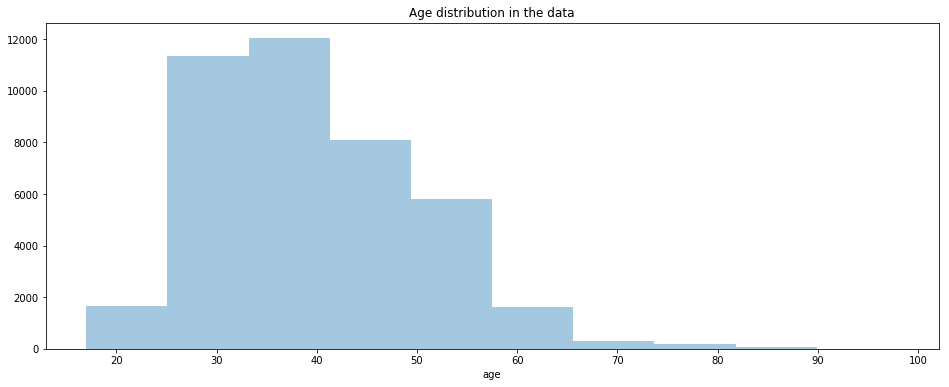

In [9]:
#histogram
h = sns.distplot(full_data['age'], bins=10, kde=False)
plt.title('Age distribution in the data')
h.figure.set_size_inches(16,6)

C:\Users\user1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


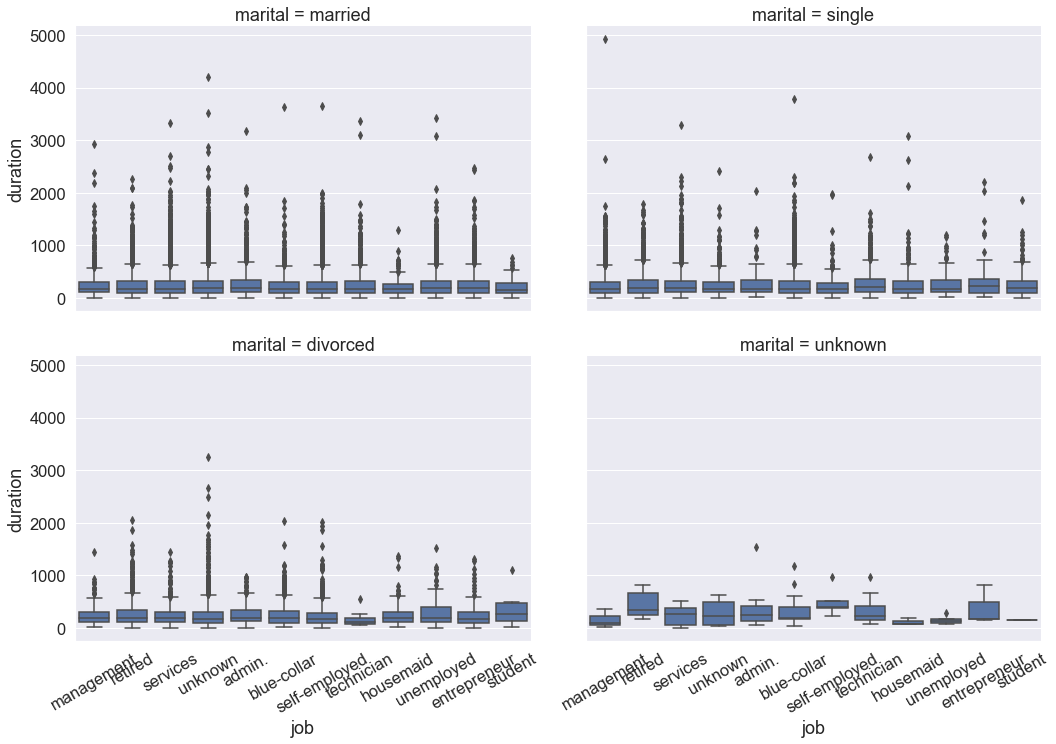

In [10]:
 
sns.set(font_scale=1.5)
g = sns.FacetGrid(full_data, col="marital", col_wrap=2, size=5, aspect=1.5)  
g.map(sns.boxplot, "job","duration").set_xticklabels(rotation=30)


C:\Users\user1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


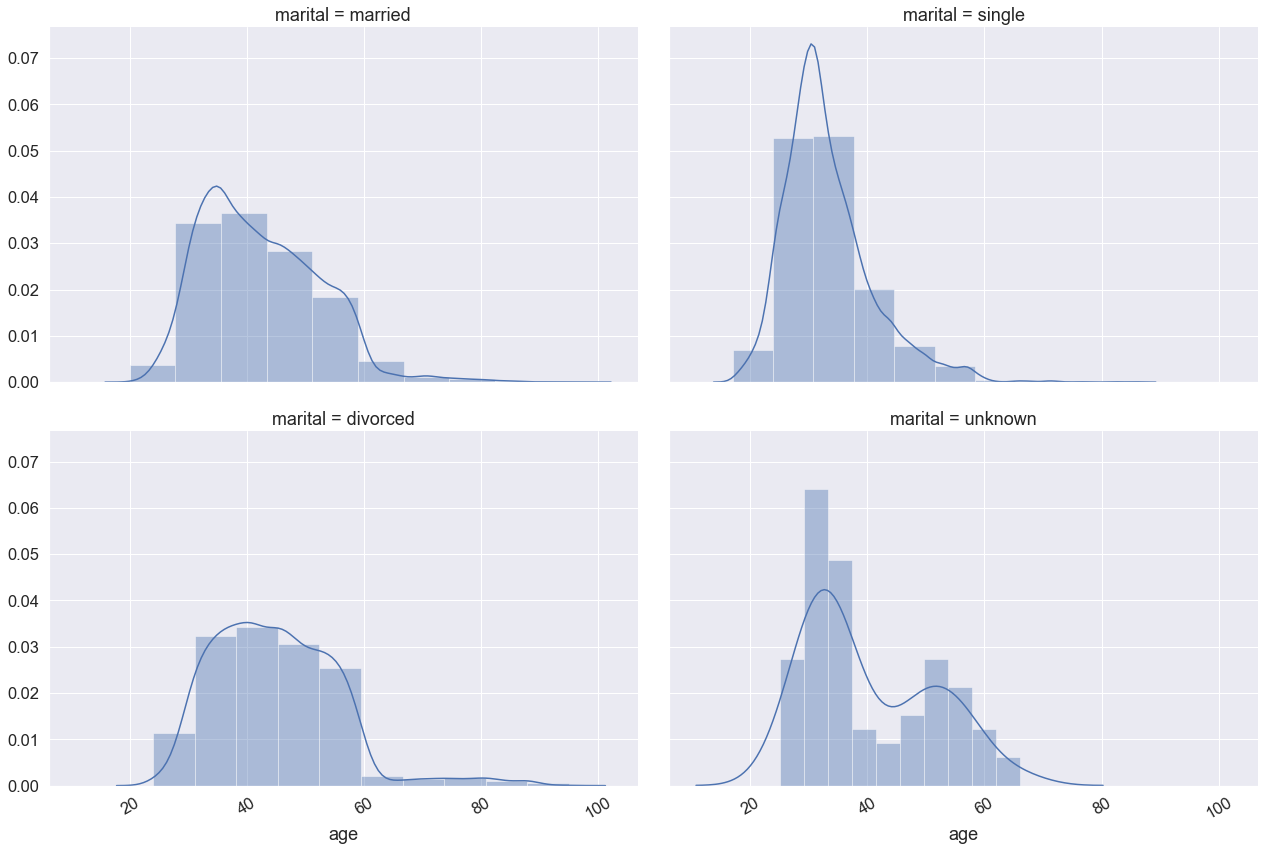

In [11]:
sns.set(font_scale=1.5)
g = sns.FacetGrid(full_data, col="marital", col_wrap=2, size=6, aspect=1.5)  
g.map(sns.distplot, "age", bins=10).set_xticklabels(rotation=30)

C:\Users\user1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


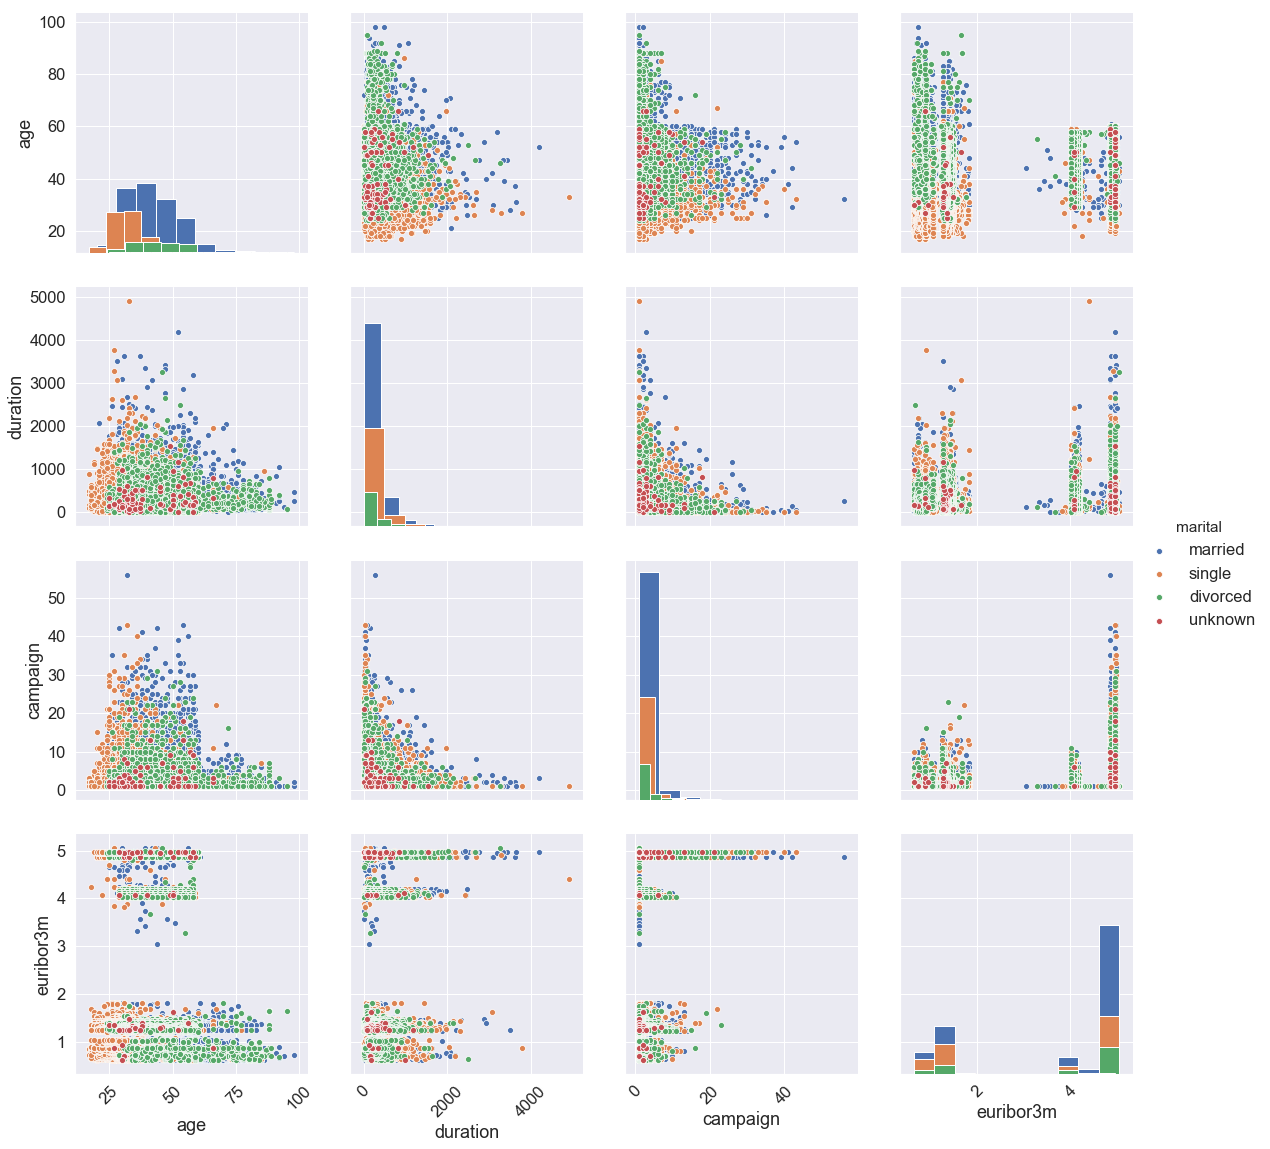

In [12]:
#'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'
sns.set(font_scale=1.5)
g = sns.pairplot(full_data[["age", "duration", "marital", "campaign","euribor3m"]], hue="marital", diag_kind="hist", size=4)  
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)

C:\Users\user1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1241: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


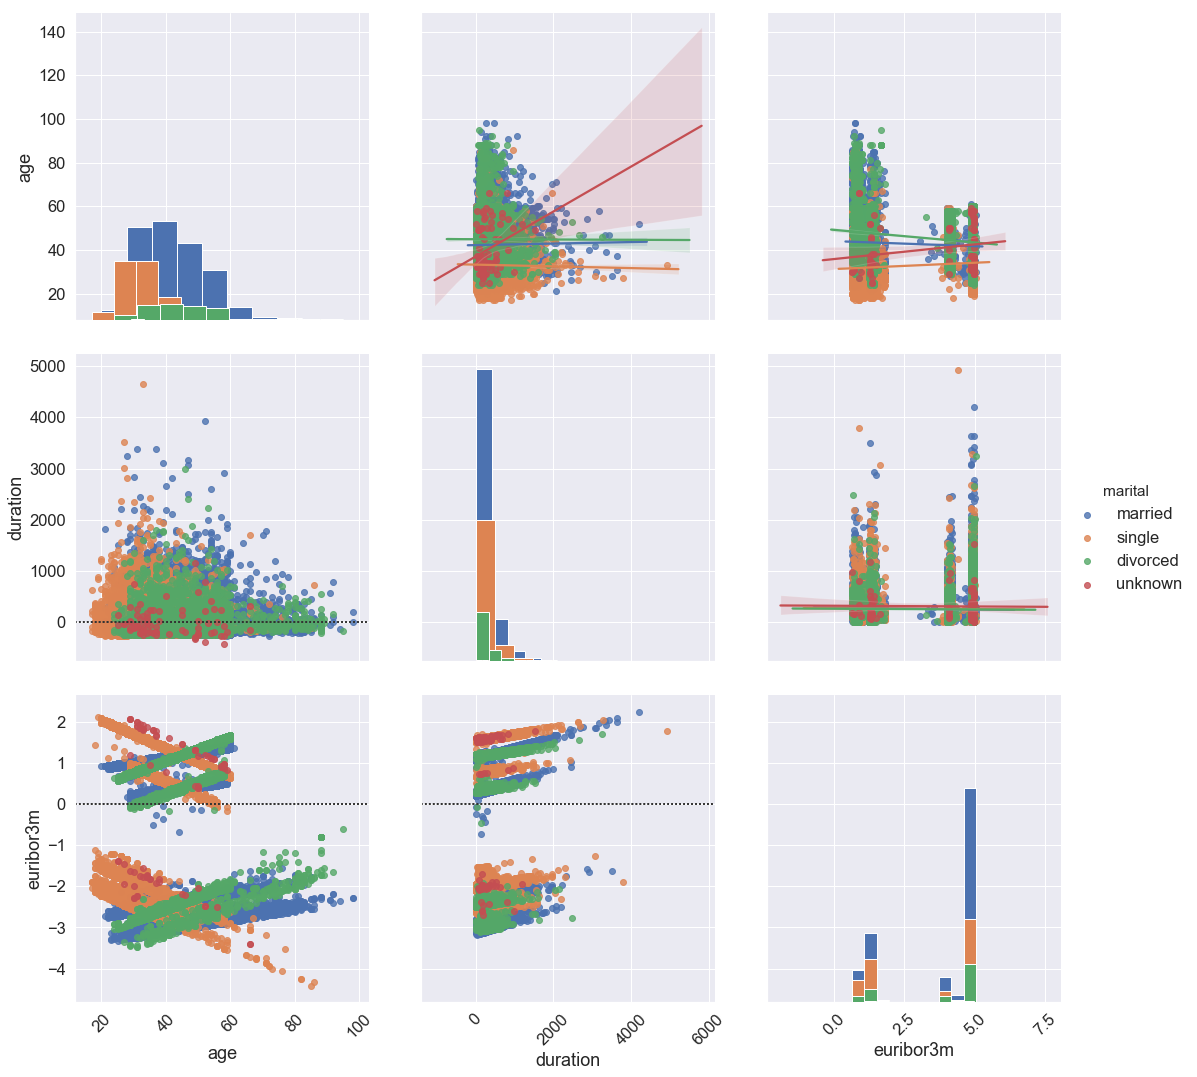

In [13]:
sns.set(font_scale=1.5)
g = sns.PairGrid(full_data[["age", "duration", "marital", "euribor3m"]], hue="marital", size=5)  
g.map_upper(sns.regplot)  
g.map_lower(sns.residplot)  
g.map_diag(plt.hist)  
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)
g.add_legend()  
g.set(alpha=0.5)


C:\Users\user1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


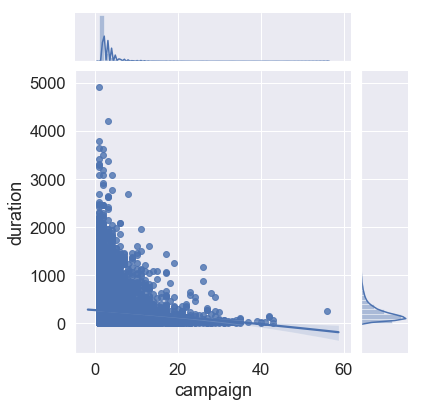

In [14]:
sns.set(font_scale=1.5)
g = sns.JointGrid(x="campaign", y="duration", data=full_data, size=6)  
g.plot_joint(sns.regplot, order=2)  
g.plot_marginals(sns.distplot)  

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text yticklabel objects>)

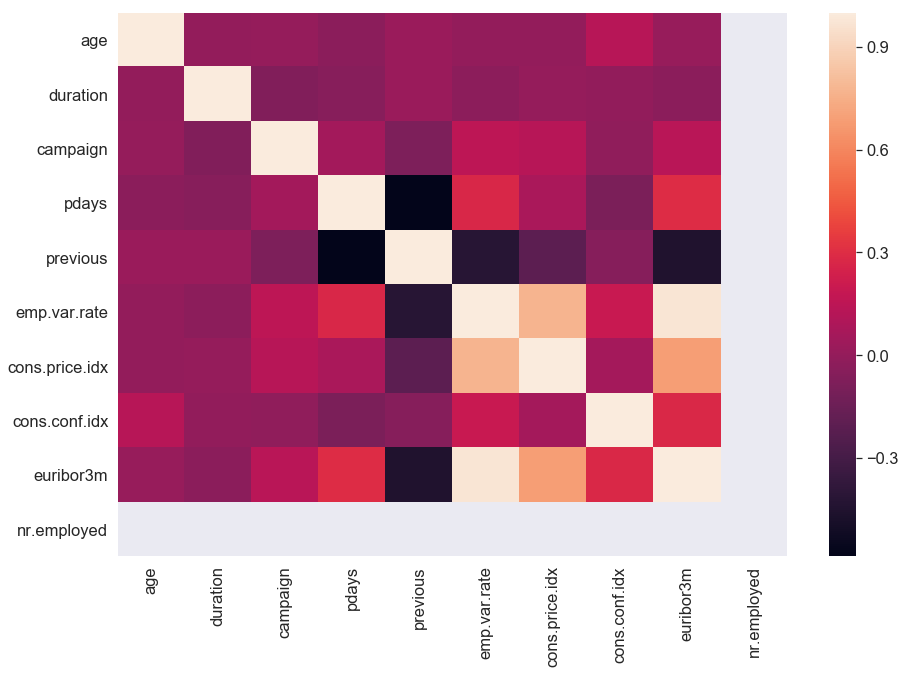

In [15]:
# visulize correlations of features with a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(full_data.corr())
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# 2. Data Preprocessing/Cleaning

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues.Here I will split the data into features and target/label columns to prepare the data and perform data cleaning also check for quality of given data.To check the goodness of the model I created,I will split the data into `training` and `validation` sets and check the accuracy of the best model.I would further split the given `training` data into two of which 70% will be used to train our models and 30% we will be used as a `validation` set. 

### 2.1 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply yes/no, e.g. housing. These can be reasonably converted into 1/0 (binary) values.
Other columns, like profession and marital, have more than two values, and are known as categorical variables. The recommended way to handle such a column is to create as many columns as possible values (e.g. profession_admin, profession_blue-collar,  etc.), and assign a 1 to one of them and 0 to all others.
These generated columns are sometimes called dummy variables, and we will use the pandas.get_dummies() function to perform this transformation. The code cell below performs the preprocessing routine.

In [16]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no','unknown'], [1, 0, np.nan])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

full_data = preprocess_features(full_data)
print("Processed feature columns ({} total features):\n{}".format(len(full_data.columns), list(full_data.columns)))


Processed feature columns (55 total features):
['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default', 'housing', 'loan', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


### 2.2 Identify feature and target columns

In [17]:
# Extract feature columns
feature_cols = list(full_data.columns[:-1])

# Extract target column 'responded'
target_col = full_data.columns[-1] 

# Show the list of columns
print("Feature columns:\n{}".format(feature_cols))
print("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = full_data[feature_cols]
y_all = full_data[target_col]

# Show the feature information by printing the first five rows
print("\nFeature values:")
print(X_all.head())

Feature columns:
['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default', 'housing', 'loan', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Target column: y

Feature values:
   age  job_admin.  job_blue-

### 2.3 Data cleaning/washing 

Checking out the missing values in our data set at present:

In [18]:
X_all.isnull().sum()

age                                  0
job_admin.                           0
job_blue-collar                      0
job_entrepreneur                     0
job_housemaid                        0
job_management                       0
job_retired                          0
job_self-employed                    0
job_services                         0
job_student                          0
job_technician                       0
job_unemployed                       0
marital_divorced                     0
marital_married                      0
marital_single                       0
education_basic.4y                   0
education_basic.6y                   0
education_basic.9y                   0
education_high.school                0
education_illiterate                 0
education_professional.course        0
education_university.degree          0
default                           8597
housing                            990
loan                               990
contact_cellular         

From above observations its clear that we have 4 columns that have missing values.

But dropping of all these columns at a time may result in loss of important information about the dataset.`default`, `housing` and `loan` are the four columns that has the most missing values but instead of dropping these altogether I will try to impute them as they may hold relevant information for the dataset. `nr.employed` has too many missing so we will go ahead and drop it.
 We will use `median` statistic to fill out missing values.

In [19]:
X_all.drop('nr.employed',  axis=1, inplace=True)

C:\Users\user1\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [20]:
X_all.fillna(X_all.median(), inplace=True)
X_all.describe()

C:\Users\user1\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,campaign,pdays,previous,poutcome_failure,poutcome_nonexistent,poutcome_success,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,0.253035,0.224677,0.035350,0.025736,0.070992,0.041760,0.034500,0.096363,0.021244,...,2.567593,962.475454,0.172963,0.103234,0.863431,0.033335,0.081886,93.575664,-40.502600,3.621291
std,10.42125,0.434756,0.417375,0.184665,0.158348,0.256814,0.200042,0.182513,0.295092,0.144199,...,2.770014,186.910907,0.494901,0.304268,0.343396,0.179512,1.570960,0.578840,4.628198,1.734447
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000
25%,32.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,999.000000,0.000000,0.000000,1.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000
50%,38.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,999.000000,0.000000,0.000000,1.000000,0.000000,1.100000,93.749000,-41.800000,4.857000
75%,47.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,999.000000,0.000000,0.000000,1.000000,0.000000,1.400000,93.994000,-36.400000,4.961000
max,98.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,56.000000,999.000000,7.000000,1.000000,1.000000,1.000000,1.400000,94.767000,-26.900000,5.045000


In [21]:
print("Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns)))

Processed feature columns (53 total features):
['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_divorced', 'marital_married', 'marital_single', 'education_basic.4y', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default', 'housing', 'loan', 'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']


In [22]:
# Export cleaned data

filename = 'cleaned_X_all.csv'
X_all.to_csv(filename, index=False, encoding='utf-8')
filename = 'cleaned_y_all.csv'
y_all.to_csv(filename, index=False, encoding='utf-8')

In [23]:
# Read cleaned data directly
import numpy as np
import pandas as pd
from pandas import Series
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from IPython.display import display
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression                   
from sklearn.ensemble import AdaBoostClassifier


%matplotlib inline

in_file = 'cleaned_X_all.csv'
X_all = pd.read_csv(in_file)
in_file = 'cleaned_y_all.csv'
y_all = pd.read_csv(in_file, squeeze=True, header=None)

### 2.4 Training and Validation Data Split

So far, I have converted all categorical features into numeric values. For the next step, I will split the data (both features and corresponding labels) into training and test sets. In the code cell below, we will implement the following:
 - Randomly shuffle and split the data (`X_all, y_all`) into training and validation subsets.
 - Split training and validation into 70% and 30%.
 - Set a `random_state` for the function(s).
 - Store the results in `X_train, X_validation, y_train` and `y_validation`.

In [24]:
validation_size = 0.30
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_all, y_all, stratify = y_all, 
                                                    test_size = validation_size, random_state = 123)
print("Train set 'yes' pct = {:.2f}%".format(100 * (y_train == 1).mean()))
print("Validation  set 'yes' pct = {:.2f}%".format(100 * (y_validation == 1).mean()))

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Validation set has {} samples.".format(X_validation.shape[0]))

Train set 'yes' pct = 11.27%
Validation  set 'yes' pct = 11.26%
Training set has 28831 samples.
Validation set has 12357 samples.


# 3. Evaluating Models

We don't know which algorithms would be best for our dataset. So let's pick a few algorithms to evaluate.
 - Logistic Regression (LR)
 - Decision tree(DT)
 - Adaptive Boosting (AB)
  
 
We use 10-fold cross validation to estimate accuracy. This will split our dataset into 10 parts,performs training on 9 and testing on 1 and repeat for all combinations of train-test splits.
 
Also, we use the metric of `f1score` to evaluate models. This is a ratio of the number of correctly predicted instances is divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate). We will  use the `scoring` variable when we run build and evaluate each model next.

### 3.1 Build Models 

In [34]:
from sklearn.metrics import f1_score, accuracy_score
clf=LogisticRegression()
clf1=DecisionTreeClassifier()
clf2=AdaBoostClassifier()
clf=clf.fit(X_train, y_train)
pred1=clf.predict(X_validation)
print("accuracy score of Logistic Regression is")
ac1=accuracy_score(y_validation,pred1)
print(ac1)
clf1=clf1.fit(X_train,y_train)
pred2=clf1.predict(X_validation)
ac2=accuracy_score(y_validation,pred2)
print("accuracy score of Decision Tree is")
print(ac2)
clf2=clf2.fit(X_train,y_train)
pred3=clf2.predict(X_validation)
ac3=accuracy_score(y_validation,pred3)
print("accuracy score of Adaboost is")
score2=f1_score(y_validation,pred3)
print(ac3)



C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy score of Logistic Regression is
0.9095249656065388
accuracy score of Decision Tree is
0.88864611151574
accuracy score of Adaboost is
0.9102532977259853


In [31]:
scoring = 'f1'

#Spot check algorithms
models = []
models.append(('1. LR', LogisticRegression()))
 
models.append(('2. DT', DecisionTreeClassifier()))
models.append(('3. AB', AdaBoostClassifier()))
 
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits = 10, random_state = 10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train,
                                                cv = kfold, 
                                                 scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

1. LR: 0.504600 (0.022563)
2. DT: 0.520372 (0.020061)
3. AB: 0.495485 (0.023249)


### 3.2 Select Best Model

We now have 3 models and estimated accuracies for each of them.Now we need to compare these models with each other and select the most accurate one among the three. The output of above code cell shows `Decision Tree` has the highest estimated accuracy score and can be chosen as the best model among the three. 

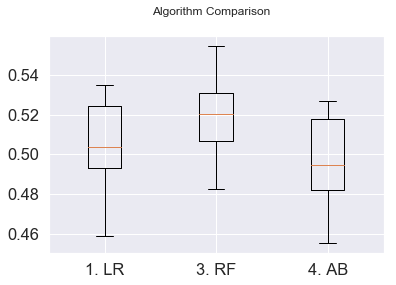

In [30]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### 3.3 Make predictions on the validation set 

The `Decision Tree` model is the most accurate model among the models that we have tested. Now we want to know about the accuracy of this model on our validation set.
This will give us an independent final check on the accuracy of th best model.

We can run the `Decisiontree` model directly on the validation set and summarize the results as a final accuracy score, a confusion matrix and a classification report.

In [36]:
# Select best model
# Make predictions on validation dataset
rf = DecisionTreeClassifier(random_state=0)
fit = rf.fit(X_train, y_train)
rf.pred = rf.predict(X_validation)
print("F1 Score: ",f1_score(y_validation, rf.pred))
print("----------------------------------------------------------")
print("Confusion Matrix: \n",confusion_matrix(y_validation, rf.pred))
print("----------------------------------------------------------")
print("Classification Report: \n",classification_report(y_validation, rf.pred))


F1 Score:  0.5121865065347934
----------------------------------------------------------
Confusion Matrix: 
 [[10251   714]
 [  667   725]]
----------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.93      0.94     10965
           1       0.50      0.52      0.51      1392

   micro avg       0.89      0.89      0.89     12357
   macro avg       0.72      0.73      0.72     12357
weighted avg       0.89      0.89      0.89     12357



We can see the f1score is 0.51 or 51.2%. The confusion matrix provides an indication of the prediction errors made. Finally the classification report provides a breakdown of each class by precision, recall, f1-score and support.

## Parameter Tuning

In [71]:
 #Tune random state
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier()
parameters= {'max_depth':[2,6],'random_state':[1,5],'max_leaf_nodes':[5,30]}
g = GridSearchCV(estimator=clf, param_grid=parameters,cv=10,scoring='f1')
g.fit(X_train, y_train)
print(g)
# summarize the results of the grid search

print(g.best_score_)
print(g.best_params_)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 6], 'random_state': [1, 5], 'max_leaf_nodes': [5, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)
0.5842369688896417
{'max_depth': 2, 'max_leaf_nodes': 30, 'random_state': 1}


## Make predictions on the validation set based on tuned model
The Decision Tree model was the most accurate model that we tested. Now we want to get an idea of f1 score of the model on our validation set. This will give us an independent final check on the f1score  of th best model.

We can run the Decision Tree model directly on the validation set and summarize the results as a final f1 score, a confusion matrix and a classification report.

In [35]:
# Select best model
# Make predictions on validation datasex using tuned parameters
from sklearn.tree import DecisionTreeClassifier
tuned_model = DecisionTreeClassifier(max_depth=2,max_leaf_nodes=30,random_state=1)
tuned_fit = tuned_model.fit(X_train, y_train)
tuned_pred = tuned_model.predict(X_validation)

print("F1 score: ",f1_score(y_validation, tuned_pred))
print("----------------------------------------------------------")
print("Confusion Matrix: \n",confusion_matrix(y_validation, tuned_pred))
print("----------------------------------------------------------")
print("Classification Report: \n",classification_report(y_validation, tuned_pred))

Accuracy Score:  0.6034665723381677
----------------------------------------------------------
Confusion Matrix: 
 [[10383   582]
 [  539   853]]
----------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     10965
           1       0.59      0.61      0.60      1392

   micro avg       0.91      0.91      0.91     12357
   macro avg       0.77      0.78      0.78     12357
weighted avg       0.91      0.91      0.91     12357

